Limpeza e tratamento de dados

In [1]:
import pandas as pd 
import seaborn as sns
import statistics as sts

In [2]:
dataset = pd.read_csv("/home/audrey/Área de Trabalho/data-science/LimpezaTratamentoDeDados/dados/tempo.csv", sep = ";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
dataset.shape

(14, 5)

In [4]:
#explorando dados categóricos
#Aparencia
aparenciaAgrupado = dataset.groupby(['Aparencia']).size()
aparenciaAgrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

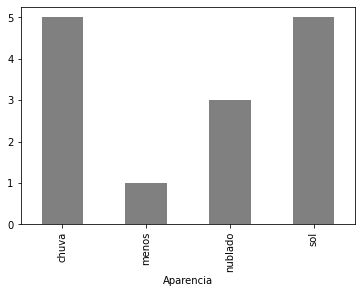

In [5]:
aparenciaAgrupado.plot.bar(color = 'gray')

In [6]:
#Vento
ventoAgrupado = dataset.groupby(['Vento']).size()
ventoAgrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

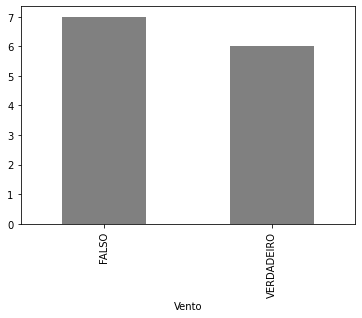

In [7]:
ventoAgrupado.plot.bar(color = 'gray')

In [8]:
#Jogar
jogarAgrupado = dataset.groupby(['Jogar']).size()
jogarAgrupado

Jogar
nao    5
sim    9
dtype: int64

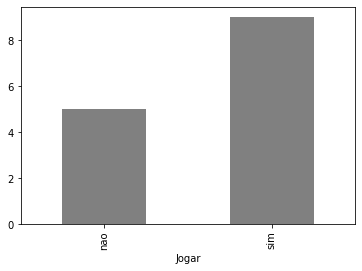

In [9]:
jogarAgrupado.plot.bar(color = 'gray')

In [10]:
#explorando dados numéricos
#Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

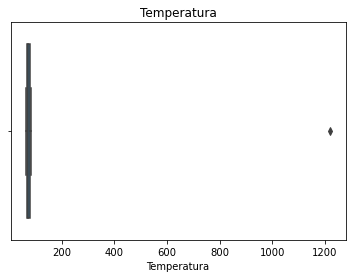

In [11]:
sns.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

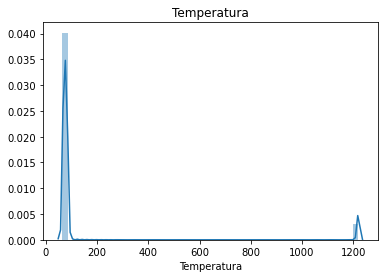

In [12]:
sns.distplot(dataset['Temperatura']).set_title('Temperatura')

In [13]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

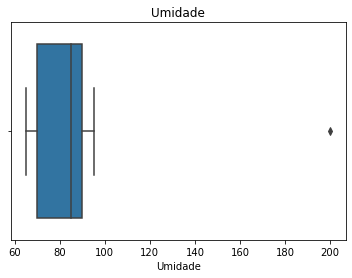

In [14]:
sns.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

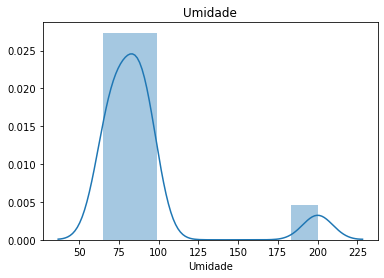

In [15]:
sns.distplot(dataset['Umidade']).set_title('Umidade')

In [16]:
#Valores NA
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [17]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [18]:
#preenchendo NAs
dataset['Umidade'].fillna(mediana, inplace = True)

In [19]:
dataset['Umidade'].isnull().sum()

0

In [20]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim


In [21]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

In [22]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [23]:
#Aparencia com valor inválido
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [24]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = "sol"
#visualizando o resultado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [25]:
#Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [26]:
#total de NAs
dataset['Vento'].isnull().sum()

1

In [27]:
#preenchendo NAs
dataset['Vento'].fillna('FALSO', inplace = True)
#checando NAs
dataset['Vento'].isnull().sum()

0

In [28]:
#Temperatura fora do domínio
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [29]:
#visualizando
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [30]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [31]:
#substituindo
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

In [32]:
#verificando se ainda existem temperaturas fora do domínio
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [33]:
dataset.describe()

,Temperatura,Umidade
count,14.000000,14.000000
mean,73.678571,81.285714
std,6.556286,9.585073
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.750000,85.250000
75%,78.750000,89.000000
max,85.000000,95.000000


Text(0.5, 1.0, 'Temperatura')

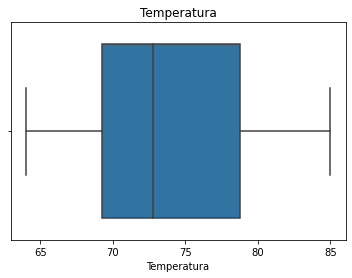

In [34]:
#Explorandos dados após tratamento
sns.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

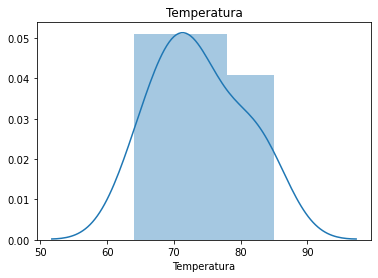

In [35]:
sns.distplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Umidade')

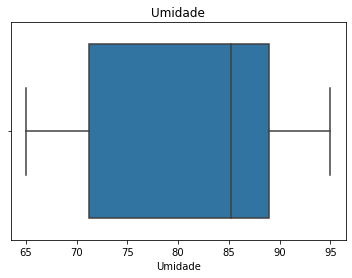

In [36]:
sns.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

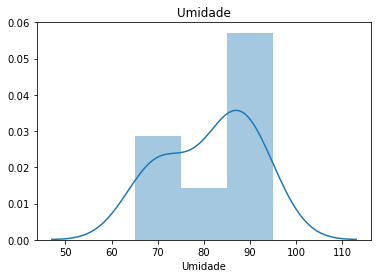

In [37]:
sns.distplot(dataset['Umidade']).set_title('Umidade')

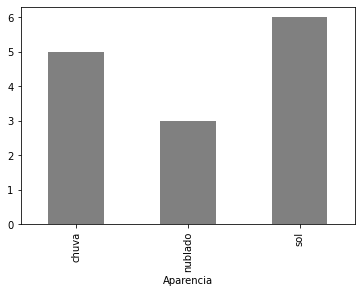

In [38]:
aparenciaAgrupado = dataset.groupby(['Aparencia']).size()
aparenciaAgrupado.plot.bar(color = 'gray')

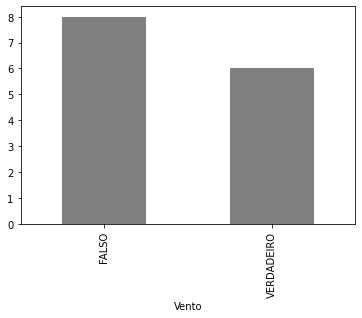

In [39]:
ventoAgrupado = dataset.groupby(['Vento']).size()
ventoAgrupado.plot.bar(color = 'gray')

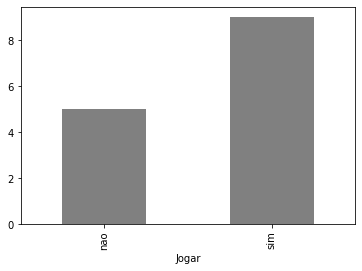

In [40]:
jogarAgrupado = dataset.groupby(['Jogar']).size()
jogarAgrupado.plot.bar(color = 'gray')